In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

!pip install numpy pandas matplotlib seaborn scikit-learn keras tensorflow opencv-python-headless
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Nadam
from keras.utils import to_categorical
from keras.layers import Dropout, Flatten, Input, Dense
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

import random
import tensorflow as tf
import cv2 as cv
import os
import glob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 1.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 2.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 1.4 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 1.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 1.1 MB/s eta 0:00:00a 0:00:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 1.5 MB/s eta 0:00:0000:0100:14m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 1.2 MB/s

2025-08-17 17:38:46.958467: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-17 17:38:46.958670: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-17 17:38:46.988812: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-17 17:38:47.947807: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

In [2]:
!pip install kagglehub
import kagglehub
import shutil

# Baixar dataset (vai para o cache padrão)
path = kagglehub.dataset_download("alxmamaev/flowers-recognition")
print("Download concluído em:", path)

# Caminho de destino que você escolher
destino = "./flowers-recognition"

# Criar pasta se não existir
os.makedirs(destino, exist_ok=True)

# Mover todos os arquivos do cache para o destino
shutil.copytree(path, destino, dirs_exist_ok=True)

destino+="/flowers/"

print("Dataset movido para:", destino)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 767.5/767.5 kB 8.3 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 19.5 MB/s eta 0:00:00


100%|██████████| 225M/225M [00:07<00:00, 33.1MB/s] 

Extracting files...


Download concluído em: /home/watcher/.cache/kagglehub/datasets/alxmamaev/flowers-recognition/versions/2
Dataset movido para: ./flowers-recognition/flowers/


In [3]:
daisy_dir = glob.glob(os.path.join(destino+"daisy/", '*'))
dandelion_dir = glob.glob(os.path.join(destino+"dandelion/", '*'))
rose_dir = glob.glob(os.path.join(destino+"rose/", '*'))
sunflower_dir = glob.glob(os.path.join(destino+"sunflower/", '*'))
tulip_dir = glob.glob(os.path.join(destino+"tulip/", '*'))

X_path = daisy_dir + dandelion_dir + rose_dir + sunflower_dir + tulip_dir

print(X_path)

X = []
for f in X_path:
  X.append(np.array(cv.resize(cv.imread(f), (224,224), interpolation = cv.INTER_AREA)))

X = np.array(X)
X = X / 255

print(X_path)
print(X.shape)

['./flowers-recognition/flowers/daisy/5054771689_00dd40b971_n.jpg', './flowers-recognition/flowers/daisy/5885826924_38fdc6bcaa_n.jpg', './flowers-recognition/flowers/daisy/8887005939_b19e8305ee.jpg', './flowers-recognition/flowers/daisy/3848258315_ed2fde4fb4.jpg', './flowers-recognition/flowers/daisy/3474942718_c418dae6f1.jpg', './flowers-recognition/flowers/daisy/5896676090_68bb74b1e9_n.jpg', './flowers-recognition/flowers/daisy/5087720485_c0914fb623.jpg', './flowers-recognition/flowers/daisy/11834945233_a53b7a92ac_m.jpg', './flowers-recognition/flowers/daisy/19280272025_57de24e940_m.jpg', './flowers-recognition/flowers/daisy/519880292_7a3a6c6b69.jpg', './flowers-recognition/flowers/daisy/22244161124_53e457bb66_n.jpg', './flowers-recognition/flowers/daisy/11023214096_b5b39fab08.jpg', './flowers-recognition/flowers/daisy/9180706736_092d43088c.jpg', './flowers-recognition/flowers/daisy/4697206799_19dd2a3193_m.jpg', './flowers-recognition/flowers/daisy/34531542152_c8ba2e0fea_n.jpg', './f

In [4]:
#Definindo as labels

l_daisy = np.zeros(len(daisy_dir))
l_dandelion = np.ones(len(dandelion_dir))
l_rose = 2*np.ones(len(rose_dir))
l_sunflower = 3*np.ones(len(sunflower_dir))
l_tulip = 4*np.ones(len(tulip_dir))

y = np.concatenate((l_daisy, l_dandelion, l_rose, l_sunflower, l_tulip))
y = to_categorical(y, 5)

In [5]:
#Separando treinamento e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=42)

In [6]:
#Para evitar problemas de overfitting, usei o ImageDataGenerator.
datagen = ImageDataGenerator(
        zoom_range = 0.1, # Aleatory zoom
        rotation_range= 15, 
        width_shift_range=0.1,  # horizontal shift
        height_shift_range=0.1,  # vertical shift
        horizontal_flip=True,  
        vertical_flip=True)
datagen.fit(X_train)

In [7]:
#CNN do zero
from tensorflow.keras.optimizers import Nadam

inp = Input((224,224,3))

conv1 = Conv2D(64, (5,5), padding='valid', activation= 'relu')(inp)
conv1 = MaxPooling2D(pool_size=(2,2))(conv1)
conv1 = BatchNormalization()(conv1)

conv2 = Conv2D(96, (4,4), padding='valid', activation= 'relu')(conv1)
conv2 = MaxPooling2D(pool_size=(2,2))(conv2)
conv2 = BatchNormalization()(conv2)

conv3 = Conv2D(128, (3,3), padding='valid', activation= 'relu')(conv2)
conv3 = MaxPooling2D(pool_size=(2,2))(conv3)
conv3 = BatchNormalization()(conv3)

conv4 = Conv2D(256, (3,3), padding='valid', activation= 'relu')(conv3)
conv4 = MaxPooling2D(pool_size=(2,2))(conv4)
conv4 = BatchNormalization()(conv4)

flat = Flatten()(conv4)

dense1 = Dense(512, activation= 'relu')(flat)
dense1 = Dropout(0.5)(dense1)
dense2 = Dense(64, activation= 'relu')(dense1)
dense2 = Dropout(0.1)(dense2)

out = Dense(5, activation = 'softmax')(dense2)

model = Model(inp, out)

model.compile(
    optimizer=Nadam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

E0000 00:00:1755463255.890232 2170962 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1755463255.897386 2170962 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [8]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 50, initial_epoch = 0, validation_data = (X_val, y_val))

Epoch 1/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 88s 795ms/step - accuracy: 0.4738 - loss: 1.6660 - val_accuracy: 0.2581 - val_loss: 3.7709
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 85s 788ms/step - accuracy: 0.6189 - loss: 1.1484 - val_accuracy: 0.2581 - val_loss: 3.8007
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 85s 789ms/step - accuracy: 0.6968 - loss: 0.8674 - val_accuracy: 0.3067 - val_loss: 2.0153
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 86s 793ms/step - accuracy: 0.7718 - loss: 0.6440 - val_accuracy: 0.3831 - val_loss: 2.1006
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 86s 792ms/step - accuracy: 0.8315 - loss: 0.4711 - val_accuracy: 0.5428 - val_loss: 1.3232
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 89s 826ms/step - accuracy: 0.8734 - loss: 0.3716 - val_accuracy: 0.6782 - val_loss: 0.9839
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 86s 799ms/step - accuracy: 0.9041 - loss: 0.2810 - val_accuracy: 0.6840 - val_loss: 0.9626
Epoch 8/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 90s 831ms/step - accuracy: 0.9186 - loss: 0

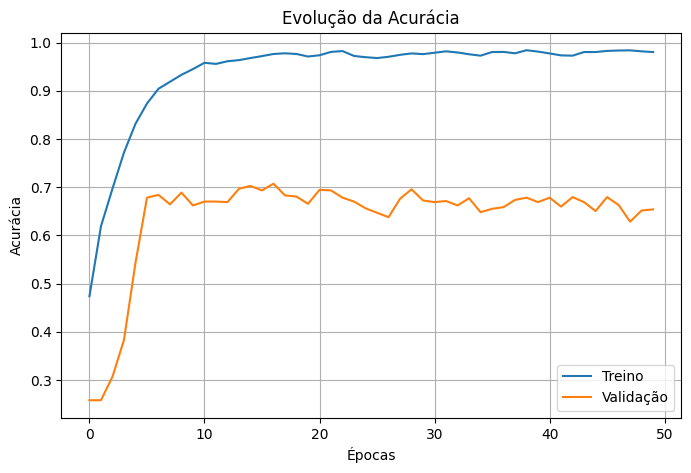

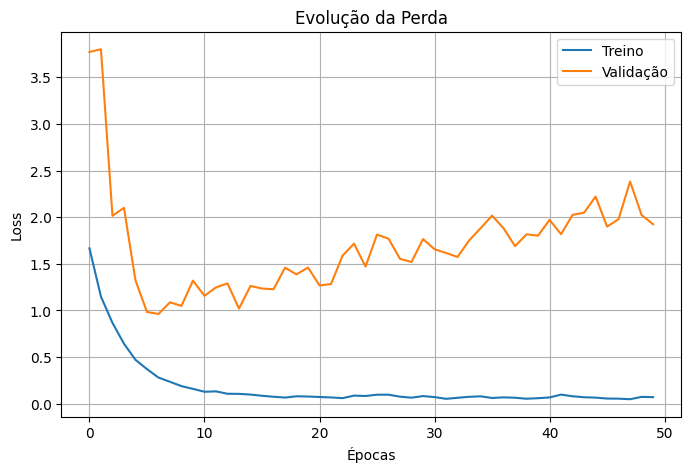

In [10]:
import matplotlib.pyplot as plt

# Acurácia
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Evolução da Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()

# Perda
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Evolução da Perda')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
#Transfer Learning
vgg = keras.applications.VGG16(input_shape=(224,224,3), include_top = False, weights= 'imagenet')

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [12]:
x = vgg.output
x = Flatten()(x)
x = Dense(3078,activation='relu')(x) 
x = Dropout(0.5)(x)
x = Dense(256,activation='relu')(x) 
x = Dropout(0.2)(x)
out = Dense(5,activation='softmax')(x)

tf_model=Model(inputs=vgg.input,outputs=out)

for layer in tf_model.layers[:20]:
    layer.trainable=False

In [16]:

tf_model.compile(
    optimizer=Nadam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = tf_model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=30,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/30
 20/108 ━━━━━━━━━━━━━━━━━━━━ 2:07 1s/step - accuracy: 0.3500 - loss: 1.7256

KeyboardInterrupt: 

In [ ]:
# Acurácia
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Evolução da Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()

# Perda
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Evolução da Perda')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()